In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
import copy
import joblib

In [2]:
# Reading training data
train_data = pd.read_csv('traindata.csv')
# Displaying the first ten rows of training data
print("Training Data:")
print(train_data.head(10))
# Reading test data
test_data = pd.read_csv('testdata.csv')
# Displaying the first ten rows of test data
print("\nTest Data :")
print(test_data.head(10))

Training Data:
   battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0            842     0          2.2         0   1.0     0.0         7.0   
1           1021     1          0.5         1   0.0     1.0        53.0   
2            563     1          0.5         1   2.0     1.0        41.0   
3            615     1          2.5         0   0.0     0.0        10.0   
4           1821     1          1.2         0  13.0     1.0        44.0   
5           1859     0          0.5         1   3.0     0.0        22.0   
6           1821     0          1.7         0   4.0     1.0        10.0   
7           1954     0          0.5         1   0.0     0.0        24.0   
8           1445     1          0.5         0   0.0     0.0        53.0   
9            509     1          0.6         1   2.0     1.0         9.0   

   m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
0    0.6      188.0      2.0  ...       20.0     756.0  2549.0   9.0   7.0   
1  

In [3]:
# Counting missing values in training data
missing_values_train = train_data.isnull().sum()
print("\nMissing Values in Training Data:")
print(missing_values_train)


Missing Values in Training Data:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [4]:
# Counting missing values in test data
missing_values_test = test_data.isnull().sum()
print("\nMissing Values in Test Data:")
print(missing_values_test)


Missing Values in Test Data:
id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64


In [5]:
#Possible solutions for handling missing values are:
# 1. Complete deletion: Remove rows with missing values
# 2. Imputation with mean, median, or mode values
# 3. Predictive modeling: Using machine learning models to fill missing values

# Removing records with missing values from training data
train_data = train_data.dropna()

In [6]:
# Displaying statistical information about the training data
# different value ranges
# StandardScaler or MinMaxScaler can be used to solve the problem of different value ranges
print("Statistical Information about the Training Data:")
print(train_data.describe())

Statistical Information about the Training Data:
       battery_power         blue  clock_speed     dual_sim           fc  \
count    1991.000000  1991.000000  1991.000000  1991.000000  1991.000000   
mean     1238.270718     0.496233     1.522451     0.510799     4.307885   
std       439.641057     0.500111     0.815499     0.500009     4.339735   
min       501.000000     0.000000     0.500000     0.000000     0.000000   
25%       851.500000     0.000000     0.700000     0.000000     1.000000   
50%      1225.000000     0.000000     1.500000     1.000000     3.000000   
75%      1615.500000     1.000000     2.200000     1.000000     7.000000   
max      1998.000000     1.000000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  1991.000000  1991.000000  1991.000000  1991.000000  1991.000000  ...   
mean      0.520844    32.074335     0.502009   140.263184     4.516323  ...   
std       0.499691    18.1381

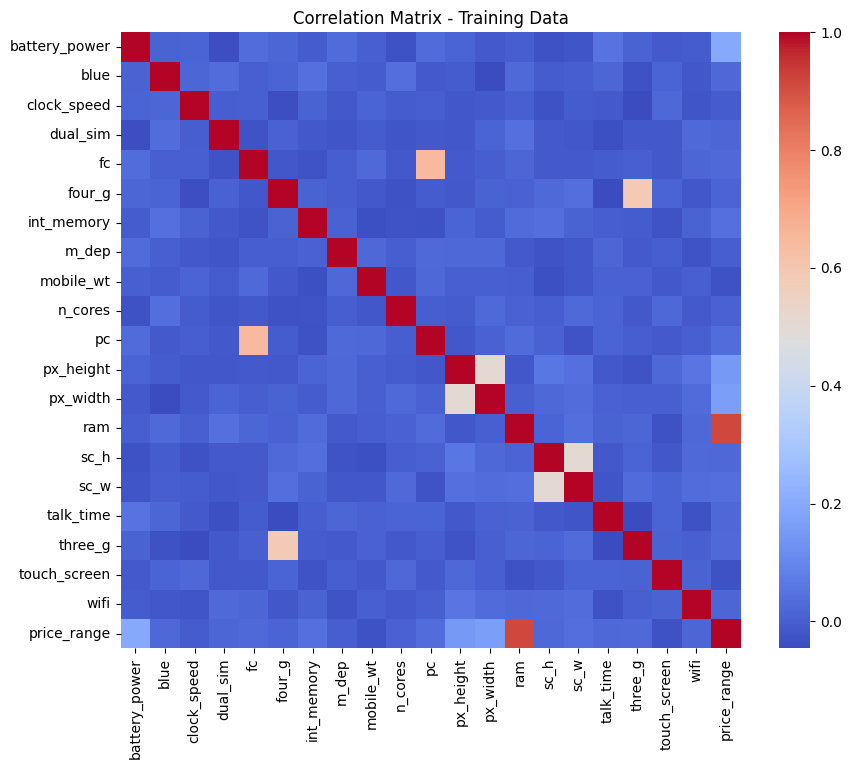

In [7]:
# Plotting correlation matrix for training data without displaying numbers
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix - Training Data')
plt.show()

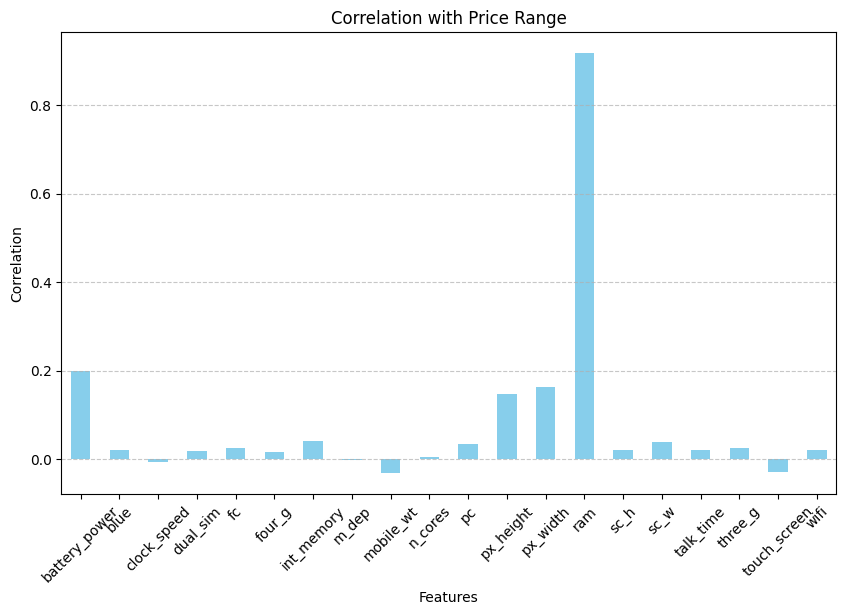

In [8]:
# Calculating correlation with price_range
# Here, we calculate the correlation between each feature and the target variable 'price_range'.
# This helps us understand which features have the strongest relationship with the target variable.
# It's important because features with higher correlation may have more predictive power in determining the price range.
#Excluding unnecessary features that exhibit negative correlation and do not add informational value helps in achieving a better model.
correlation_with_price = train_data.corr()['price_range'].drop('price_range')
# Plotting features with the highest correlation with price_range
plt.figure(figsize=(10, 6))
correlation_with_price.plot(kind='bar', color='skyblue')
plt.title('Correlation with Price Range')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

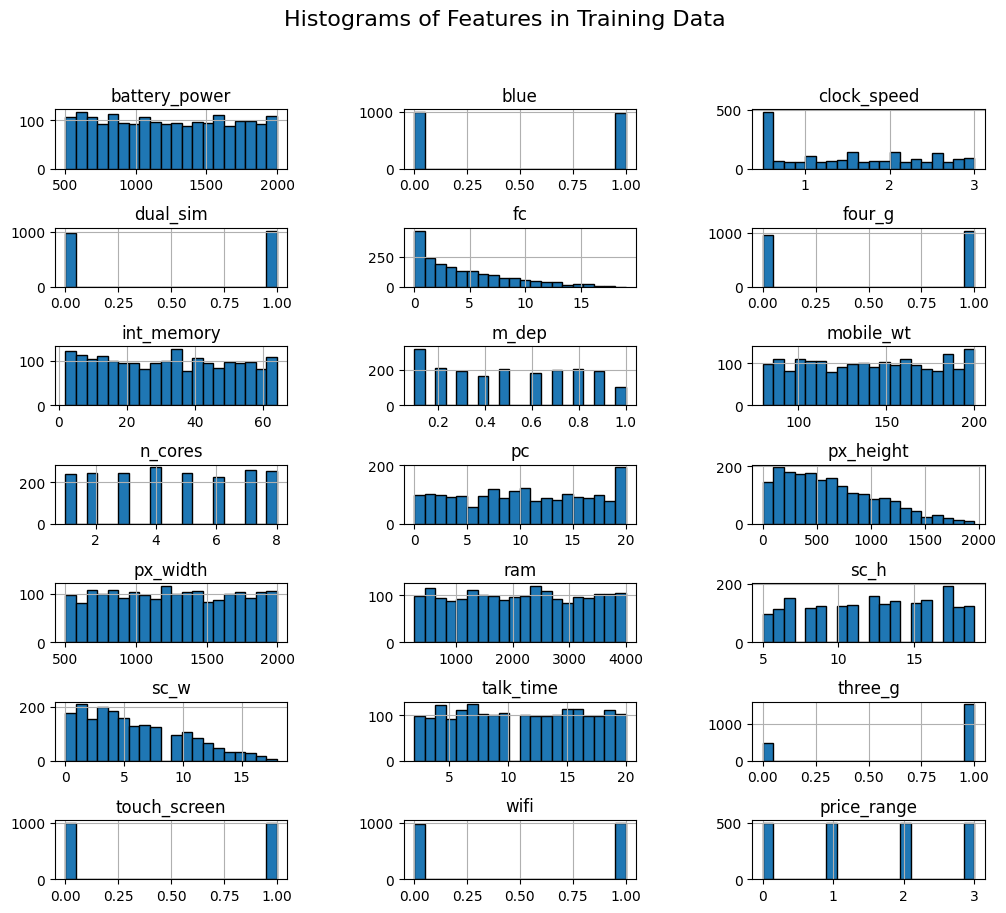

In [9]:
# Calculate Histogram for each feature 
# Calculate the number of features and determine layout dynamically
#It is observed that most of the features are distributed in a balanced manner.
num_features = train_data.shape[1]
num_rows = (num_features - 1) // 3 + 1
num_cols = min(3, num_features)

# Plotting histograms for each feature with increased spacing
train_data.hist(figsize=(12, 10), layout=(num_rows, num_cols), bins=20, edgecolor='black')
plt.suptitle('Histograms of Features in Training Data', fontsize=16)
plt.subplots_adjust(hspace=1.0, wspace=0.5)
plt.show()

In [10]:
# Splitting into input features (X) and target output (y)
X = train_data.drop(columns=['price_range'])  # Input features
y = train_data['price_range']  # Target output

# Displaying the shapes of X_train and y_train
print("Shape of X_train:", X.shape)
print("Shape of y_train:", y.shape)

Shape of X_train: (1991, 20)
Shape of y_train: (1991,)


In [11]:
# Define a list of the number of features to be tested
num_features_list = [5, 10, 15,20]

# Define the sub-models
classifiers = [
    RandomForestClassifier(n_estimators=100, random_state=42),
    SVC(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    LogisticRegression(),
    MLPClassifier(max_iter=1000),
    AdaBoostClassifier()
]

# Define the scalers
scalers = [StandardScaler(), MinMaxScaler()]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

highest_accuracy = 0
best_model = None

# Test each number of features with each model and scaler
for num_features in num_features_list:
    for scaler in scalers:
        for classifier in classifiers:
            clf_name = classifier.__class__.__name__
            scaler_name = scaler.__class__.__name__
            print("Testing", clf_name, "with", scaler_name, "and", num_features, "features")
            
            # Select the preferred features
            selector = SelectKBest(score_func=f_classif, k=num_features)
            X_train_selected = selector.fit_transform(X_train, y_train)
            X_test_selected = selector.transform(X_test)
            # Get the indices of selected features
            selected_indices = selector.get_support(indices=True)
            
            # Create steps for the pipeline
            steps = [('scaler', scaler), ('classifier', classifier)]
            pipeline = Pipeline(steps)
            
            # Train the model
            pipeline.fit(X_train_selected, y_train)
            
            # Evaluate the model
            y_pred = pipeline.predict(X_test_selected)
            accuracy = accuracy_score(y_test, y_pred)
            print("Accuracy:", accuracy)
            print("="*50)
            
            # Check the accuracy level and choose the model with the highest accuracy
            if accuracy > highest_accuracy:
                highest_accuracy = accuracy
                best_model = copy.deepcopy(pipeline)
                last_clf_name=clf_name
                last_num_features=num_features
                last_selected_indices=selected_indices
                last_X_test_selected=X_test_selected


Testing RandomForestClassifier with StandardScaler and 5 features
Accuracy: 0.9147869674185464
Testing SVC with StandardScaler and 5 features
Accuracy: 0.9323308270676691
Testing GradientBoostingClassifier with StandardScaler and 5 features
Accuracy: 0.9122807017543859
Testing KNeighborsClassifier with StandardScaler and 5 features
Accuracy: 0.8195488721804511
Testing DecisionTreeClassifier with StandardScaler and 5 features
Accuracy: 0.8546365914786967
Testing GaussianNB with StandardScaler and 5 features
Accuracy: 0.7944862155388471
Testing LogisticRegression with StandardScaler and 5 features
Accuracy: 0.9598997493734336
Testing MLPClassifier with StandardScaler and 5 features
Accuracy: 0.9598997493734336
Testing AdaBoostClassifier with StandardScaler and 5 features
Accuracy: 0.7368421052631579
Testing RandomForestClassifier with MinMaxScaler and 5 features
Accuracy: 0.9147869674185464
Testing SVC with MinMaxScaler and 5 features
Accuracy: 0.9273182957393483
Testing GradientBoosting

Accuracy: 0.9298245614035088
Testing AdaBoostClassifier with StandardScaler and 20 features
Accuracy: 0.7017543859649122
Testing RandomForestClassifier with MinMaxScaler and 20 features
Accuracy: 0.8847117794486216
Testing SVC with MinMaxScaler and 20 features
Accuracy: 0.8395989974937343
Testing GradientBoostingClassifier with MinMaxScaler and 20 features
Accuracy: 0.9223057644110275
Testing KNeighborsClassifier with MinMaxScaler and 20 features
Accuracy: 0.39348370927318294
Testing DecisionTreeClassifier with MinMaxScaler and 20 features
Accuracy: 0.8095238095238095
Testing GaussianNB with MinMaxScaler and 20 features
Accuracy: 0.8095238095238095
Testing LogisticRegression with MinMaxScaler and 20 features
Accuracy: 0.9022556390977443
Testing MLPClassifier with MinMaxScaler and 20 features


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9172932330827067
Testing AdaBoostClassifier with MinMaxScaler and 20 features
Accuracy: 0.7017543859649122


In [12]:
# Save the best model
if best_model is not None:
    joblib.dump(best_model, 'best_model.pkl')
    print("Best model {} saved with accuracy:".format(last_clf_name), highest_accuracy,' and ',last_num_features,' Features')
    # Get the names of selected features
    selected_feature_names = X_train.columns[last_selected_indices]

    print("Names of selected features:", selected_feature_names.values)

Best model LogisticRegression saved with accuracy: 0.9774436090225563  and  10  Features
Names of selected features: ['battery_power' 'int_memory' 'mobile_wt' 'n_cores' 'px_height' 'px_width'
 'ram' 'sc_h' 'sc_w' 'talk_time']


Accuracy: 0.9774436090225563


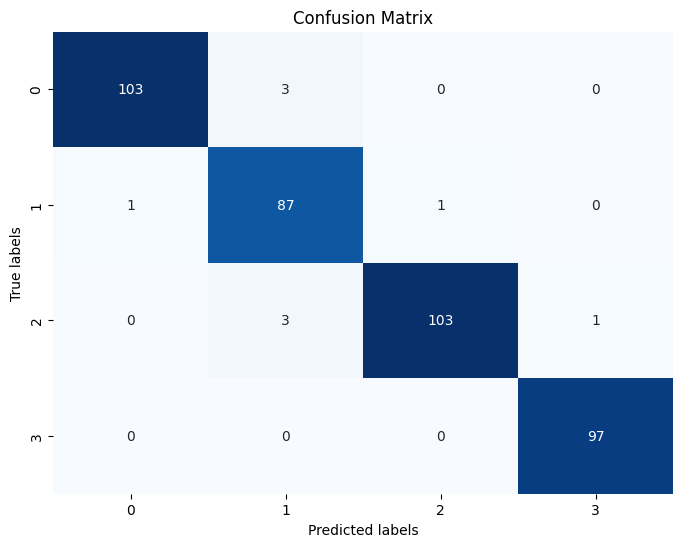

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       106
           1       0.94      0.98      0.96        89
           2       0.99      0.96      0.98       107
           3       0.99      1.00      0.99        97

    accuracy                           0.98       399
   macro avg       0.98      0.98      0.98       399
weighted avg       0.98      0.98      0.98       399



In [13]:
# Load the best model
best_model = joblib.load('best_model.pkl')

# Test the best model on test data
y_pred = best_model.predict(last_X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


In [14]:
# Reading test data
test_data = pd.read_csv('testdata.csv')
# Load the best model
best_model = joblib.load('best_model.pkl')

def predict_sample_by_id(data, model, features, sample_id):
    """
    Predicts a sample from the data based on ID using only the selected features.
    Args:
        data (pandas.DataFrame): The data to be predicted.
        model: The trained model.
        features (list): List of selected features.
        sample_id: The ID of the sample to predict.
    Returns:
        Prediction for the sample.
    """
    # Extracting the sample based on ID and selected features only
    sample = data[data['id'] == sample_id][features]
    
    # Predicting sample using the model
    prediction = model.predict(sample)
    
    return prediction

# Define the selected features
selected_features = ['battery_power', 'int_memory', 'mobile_wt', 'n_cores', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

# Define mapping for class labels
class_labels = {
    0: 'low cost',
    1: 'medium cost',
    2: 'high cost',
    3: 'very high cost'
}

# Example usage of the function to predict a specific sample using the ID, selected features, and the trained model
sample_id = 88  # Replace 1 with the desired ID
prediction = predict_sample_by_id(test_data, best_model, selected_features, sample_id)

# Map the numeric prediction to its corresponding cost level
predicted_class = class_labels[prediction[0]]
print(f"Predicted class for sample with ID {sample_id}: {predicted_class}")

Predicted class for sample with ID 88: medium cost


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [15]:
# Function to classify all samples and create a new DataFrame with labels
def classify_and_create_labeled_dataframe(data, model, features):
    """
    Classifies all samples and creates a new DataFrame with labels.
    Args:
        data (pandas.DataFrame): The data to be classified.
        model: The trained model.
        features (list): List of selected features.
    Returns:
        pandas.DataFrame: DataFrame with labeled samples.
    """
    labeled_data = data.copy()
    predictions = []
    
    for _, row in labeled_data.iterrows():
        sample_id = row['id']
        prediction = predict_sample_by_id(data, model, features, sample_id)
        predicted_class = class_labels[prediction[0]]
        predictions.append(predicted_class)
    
    labeled_data['label'] = predictions
    return labeled_data

# Reading test data
test_data = pd.read_csv('testdata.csv')

# Define the selected features
selected_features = ['battery_power', 'int_memory', 'mobile_wt', 'n_cores', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

# Classify all samples and create labeled DataFrame
labeled_test_data = classify_and_create_labeled_dataframe(test_data, best_model, selected_features)

# Save the labeled data to a new CSV file
labeled_test_data.to_csv('labeled_test_data.csv', index=False)


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\users\lenovo